# Recitation 2

- Differences in nn.Sequential() and nn.Module()
- Exercise: compute output dimensions in CNN and transposed CNN
- review EM and VAE


### nn.Sequential()

nn.Module is the base class for all neural network modules in PyTorch. As such nn.Sequential is a special kind of nn.module (subclass of nn.module). When using nn.Sequential, you are not required to write "forward" as it is implicitly known. 

### nn.Modulelist()

 ModuleList allows you to store Module as a list which python list doesn't do. It can be useful when you need to iterate through layer and store/use some information.

Unlike nn.Sequential, Modulelist requires a forward function explicitly.  

### coding example 

1. nn.Sequential() with forward()
2. nn.Sequential() without forward() 
3. nn.Module()

  1) nn.Sequential() with forward()

In [5]:

class PoissonNet(nn.Sequential):

    def __init__(self, input_dim, output_dim, hidden_dim):
        super(PoissonNet,self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dims
    
        self.sequential = nn.Sequential(
        nn.Linear(input_dim,hidden_dim[0]),
        nn.ReLU(),
        nn.Linear(hidden_dim[0],hidden_dim[1]),
        nn.ReLU(),
        nn.Linear(hidden_dim[1],hidden_dim[2]),
        nn.ReLU(),
        nn.Linear(hidden_dim[2],output_dim)
        )

    def forward(self,x): 
        # it performs the actual computation, that is, it 
        # outputs a prediction
        y = self.sequential(x)
        y = torch.exp(y)
    
        return y
    def loss_fn(self, x, y):
        lam = self.forward(x)
        loss = - lam + y * torch.log(lam) 
        out = -loss.sum()
        return out
## log lambda = beta x
## lambda = exp(bx)

2) nn.Sequential() without forward() 

In [ ]:
class PoissonNet(nn.Sequential):

    def __init__(self, input_dim, output_dim, hidden_dim):
        super(PoissonNet,self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dims
    
        self.sequential = nn.Sequential(
        nn.Linear(input_dim,hidden_dim[0]),
        nn.ReLU(),
        nn.Linear(hidden_dim[0],hidden_dim[1]),
        nn.ReLU(),
        nn.Linear(hidden_dim[1],hidden_dim[2]),
        nn.ReLU(),
        nn.Linear(hidden_dim[2],output_dim)
        )

    def loss_fn(self, x, y):
        lam = self.sequential(x)
        lam = torch.exp(lam)
        loss = - lam + y * torch.log(lam) 
        out = -loss.sum()
        return out

3) nn.Module() 

In [7]:
class PoissonNet(nn.Module):

    def __init__(self, input_dim, output_dim, hidden_dim):
        super(PoissonNet,self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dims
    
        n_layers = len(hidden_dim)
        current_dim = input_dim
        self.layers = nn.ModuleList()
        for i in range(n_layers):
            hdim = hidden_dim[i]
            self.layers.extend([nn.Linear(current_dim,hdim)
            ,nn.ReLU()])
            current_dim = hdim
        self.layers.append(nn.Linear(current_dim,output_dim))
    
    ## .extend() add multiple elements to a list
    ## .append() add a single element to a list

    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        x = torch.exp(x)
        return x
        
    def loss_fn(self, x, y):
        lam = self.forward(x)
        loss = - lam + y * torch.log(lam) 
        out = -loss.mean()
        return out
## log lambda = beta x
## lambda = exp(bx)

## Convolutional Neural Network(CNN)


#### CNN takes advantage of the local spatial coherence of input.

In most applications, we do not know what structure there is in the input. Previously, each hidden unit in the network was connected to all the inputs. However, in some applications, the input has local structure. 

For example, in vision we know that nearby pixels are correlated, and there are local features like edges and corners. Any object such as handwritten digits may be defined as a combination of such primitives. In such a case hidden units are not connected to all input units because not all inputs are correlated. Instead, we define a window (filter) to learn local structure. 


#### Filter(kernel)
 Each filter has a size, such as 3x3, that defines its scope. Each filter learn different features in CNN.

If we convert a filter matrix to a vector. Then applying filter to an input layer becomes dot products. 
Remember that the dot product takes its maximum when the two vectors are the same. 
$ \langle a, b \rangle = ||a|||b|| cos \theta$,

so if a and b are identical directions, the angle is 0 and doc product will be a maximum. In this way, area less related to a certain feature will be pushed toward to zero.

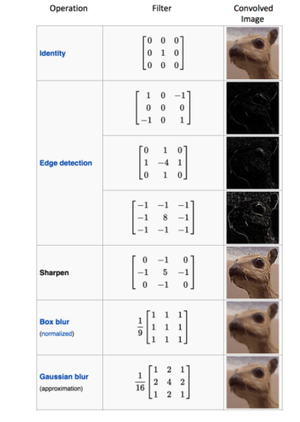

In [ ]:
## conda activate msds534
## conda install Pillow to load PIL
import os
## os.chdir('location of your working directory')
os.chdir('c:\\Users\\joonw\\\Downloads') 
cwd = os.getcwd()  # cwd 
from PIL import Image               
img = Image.open('filter.png')
img

### Padding can be used to mitigate information loss

The filter is applied at all positions in the input. On the edges of the iamge, if we do not want to lose information, we need to pad on all sides; for example, for a 3x3 filter, we add 1 layer  (typically with value zero) to the borders. 

## Exercises for computing outputsize in CNN
#### Normal convolution
Example 1: Convolution with Stride=1, No padding, 2 by 2 kernel, 4 by 4 input. Then 3 by 3 output. 

Example 2: Convolution with Stride=2, padding=1, 2 by 2 kernel, 4 by 4 input. Then 3 by 3 output. 

outputsize for a convolution = (input size+ 2*padding - (kernel size-1)-1)/stride +1

#### Transpose convolution

1) Unlike normal convolution, stride option is used to set how far apart the original cells are in the intermediate grid. 
2) Add cells with 0 so that a kernel in the top left covers one of the original cells.
3) if padding =1, then remove 1 ring from around the intermediate grid. 

Example 3: Transpose convolution with stride=1, no padding, 2 by 2 kernel, 5 by 5 input. Then 6 by 6 output. 

Example 4: Transpose convolution with stride=2, padding=1, 2 by 2 kernel, 3 by 3 input. Then 4 by 4 output. 

output size for transposed convolution = 
(input size-1)*stride- 2*padding + (kernel size-1)+1

### Input channel and output channel

Input Channel:
In the case of grayscale images, there is typically just one input channel. For color images, RGB, 3 input channels.

Example 1:
x.shape = 60000, 1, 64,64.                       
                                   
number of samples = 60000,                 
input channel = 1, maybe grayscale image,           
each image is 64 by 64.                          

Output Channel: If you use 20 filters to learn 20 features, then output channel is 20. 

## Variational Auto Encoder

VAEs use an algorithm called "variational inference", and this is similar to well known EM algorithm.



### EM algorithm

GMM(gaussian mixture model) assumes there are  k different clusters.  If we know which cluster each data point belongs to $\color{cyan} \text{ (the labels)} $, we can easily estimate the parameters(we can do MLE), or if we know the  $\color{orange} \text{ parameters }$ for k clusters, we can predict the labels. Unfortunately, we don't know both in many cases. Then to solve this $\color{cyan} \text{chicken}$ and $\color{orange} \text{egg} $ problem, we use an alternate algorithm called EM algorithm. 

Example: 2 Clusters GMM (assume prior distribution is binomial)
1. Set initial parameters $\theta= \{\pi, \mu_{1:2}, \sum_{1:2} \} $,
where prior,$ \ \pi = p(z_i)= \phi^{z_i}(1-\phi)^{1-z_i}, \  z_i=0 \ or  \ 1 $, is known. 

2. EM algorithm
    E-step $p(z|x, \theta^{(\theta)})$: Fix gaussian models, and update information about $\color{cyan} \text{the labels}$. 

    Note that $p(z_i|x_i; \theta) = \frac{ p(z_i,x_i; \theta) }{p(x_i| \theta)}= \frac{p(x_i|z_i;\theta)\pi}{p(x_i| \theta)}$.

    M-step: We can estimate $\color{orange} \text {the parameters}$ by maximum likelihood estimation(MLE) on logp(x|$\theta$). But as taught in class, for computation efficiency, we do MLE on ELBO. Usually we set the derivatives equal to zero.

    repeat until E-step and M-step until $|\theta^{(t)}- \theta^{(t+1)}|< \epsilon.$











### When do we use Variational Autoencoder

Suppose we believe there exist latent factors z but we don't want to assume linear relation between x and z as in factor analysis. Then we can express x as 

$x_i = f_\theta(z_i) + e_i,$ note that in FA, $f_\theta(z_i)=Bz_i.$ 

Probabilistic model:
1) $z_i \sim N(0,1)$              
2) $z_i \perp e_i,$ $e_i\sim  N(0,I).$
3) $x_i|z_i \sim N(f_\theta(z_i),I).$

## Variational inference (generalization of EM algorithm)

####  $q(z_i)$ close to $p(z_i|x_i;\theta)$?

In a simple model we can compute $p(z|x; \theta)$ in E step and do MLE on ELBO(lower bound of loglikelihood). But $p(z|x; \theta)$ is complicated in VAE.

To see this, fix $\theta$, 

$p(z_i) = p(x_i|z_i)p(z_i)/ p(x_i|\theta),$ and $p(x_i)=\int p(x_i|z_i)p(z_i)dz$, so for $p(x_i|\theta)$, we need to integral over all of the dimensions of the latent space, which is not feasible to calculate. 

We choose $q_\phi(z_i)$ to approximate the true posterior $p(z_i)$, where we define "closeness" as the KL divergence.


In VAE, we choose $ N( \mu_{\phi^{(1)}}(x_i), diag(exp({\phi^{(2)}(x_i)})))$, where $\phi^{(1)}$ and $\phi^{(2)}, \phi \in R^{R}$ are two neural networks that map x to mean and log of the variance.


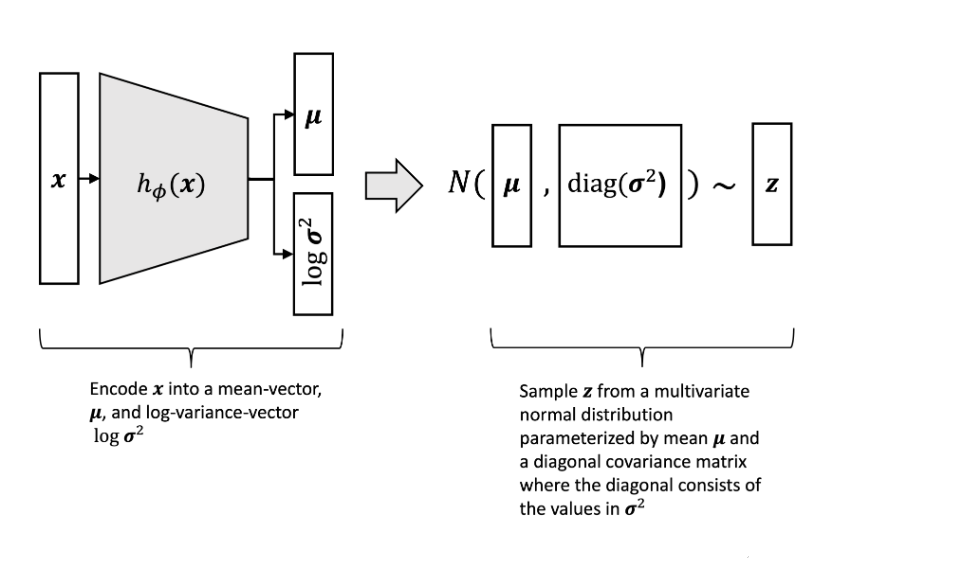

In [12]:

img2 = Image.open('vae1.png')
img2


### How do we compute $q(z_i)$?

1. For fixed $\theta$, for each $x_i$, find $q(z_i)$ to approximate $p(z_i|x_i)$.
2. Find maximum likelihood estimates of $\theta$.

 It turns out that the task of minimizing the KL-divergence is equivalent to maximizing EBLO

(You can skip this part and convince yourself)

 $KL( q(z_i) || p(z_i|x_i;\theta)):= E_{z \sim q} \biggl[ log \frac{q(z_i)}{ p(z_i|x_i)}\biggr] \\ $ 
= $E_{z \sim q} [log(q(z_i))] - E_{z \sim q} \biggl[ log \frac{p(z_i,x_i)}{ p(x_i\theta)}\biggr] \\ $
$= E_{z \sim q} [log(q(z_i))]- E_{z \sim q} [log p(x_i,z_i)] + E_{z \sim q} [log p(x_i;\theta)]  \\ $
$= log p(x_i;\theta) - E_{z \sim q} log \frac{p(x_i,z_i)}{q(z_i)} \\ $
$= log p(x_i;\theta) - ELBO_i \\ $
$ = E_{z \sim q}[logp(x_i|z_i)] - ELBO_i. $

 
 
 Now the algorithm can be written as

 1. For fixed $\theta$, maximize ELBO over $\phi$ to solve for $q(z_i)$.
 2. For fixed $\phi$, maximize ELBO over $\theta$.
 
 Repeat until convergnce. 



### How do we compute ELBO for VAE?

We need to compute ELBO and then take gradients $\nabla_{\theta,\phi} ELBO$ to apply SGD. 

$EBLO_i =  E_{z \sim q}[logp(x_i|z_i)] - KL( q(z_i) || p(z_i|x_i;\theta)). \\ $
Note that $x_i|z_i \sim N(f_\theta(z_i), I),$ which means 


1. $logp(x_i|z_i) \approx -\frac{1}{2} ||x_i- f_\theta(z_i)||_2^2.$

2. For now learn by heart that (when posterior and prior are gaussian):

$KL( q(z_i) || p(z_i|x_i;\theta))  \\ $
$= \frac{1}{2} \sum_{j=1}^G \biggl[ 1+ log[(\sigma^2_\phi(x_i))_j] -[(\mu_\phi(x_i))_j]^2 - [(\sigma^2_\phi(x_i))_j]  \biggr]. $

Now we have the expression on the lecture 5, 

$ELBO_i =   -\frac{1}{2} E_{z \sim q}||x_i- f_\theta(z_i)||_2^2 \\  + \frac{1}{2} \sum_{j=1}^G \biggl[1+ log[( \sigma^2_\phi(x_i))_j] -[(\mu_\phi(x_i))_j]^2 -  [(\sigma^2_\phi(x_i))_j]  \biggr].$

For the first term, use 1) Monte Carlo approximation to approximate the integral and we use reparametrization trick. 

2) Reparametrization trick: 

1. Sample a random value $e_i$ from N(0,1)
2. Compute the latent $z_i$ as $z_i= \mu+ e_i* \sigma$.

The key idea is that sampling step in 1. is separated from $\mu, \sigma.$ This allows you to compute gradients gradients with respect to $\mu, \sigma$. 






In [ ]:
class VAE(torch.nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim, loss_type='mse'):
        super(VAE,self).__init__()
        self.loss_type = loss_type
        self.q_z = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                 nn.ReLU())
        
        self.z_mean = nn.Linear(hidden_dim, latent_dim)
        self.z_log_var = nn.Linear(hidden_dim, latent_dim)

        self.generator = nn.Sequential(nn.Linear(latent_dim,hidden_dim),
                                       nn.ReLU(),
                                       nn.Linear(hidden_dim,input_dim))
        
    def encode(self,x):
        q_z = self.q_z(x)
        z_mean = self.z_mean(q_z)
        z_log_var = self.z_log_var(q_z)
        return z_mean, z_log_var 
    
    def reparametrize(self,mean, log_var):
        std = torch.exp(0.5*log_var) 
        eps = torch.randn_like(std) # sample from N(0,1), sample size= std size
        sample = mean + eps*std 
        return sample 
    
    def decode(self, z):
        x_reconstructed = self.generator(x)

        if self.loss_type=='binary':
            x_reconstructed = F.sigmoid(x_reconstructed)
        return x_reconstructed
    
    def forward(self,x):
        z_mean, z_log_var = self.encode(x)
        z = self.reparametrize(z_mean, z_log_var)
        x_mean = self.decode(z)

        return x_mean, z, z_mean, z_log_var
    
    def reconstruction_loss(self,x_pred,x):
        if self.loss_type == 'mse':
            loss = nn.MSELoss() ## returns 1/N || ||^2
            reconstruction_loss = 0.5* loss(x_pred,x)
    # This is the first term in ELBO but divide by N.
    #  1/N* \sum_{i=1}^{N}  1/L*\sum_{l=1}^L ||x_i- f_\theta (z_i^{(l)})||^2
    # It has been studied that we can set L=1 as long as the minibatch size was large enough e.g. M =100.
    # reference: https://arxiv.org/pdf/1312.6114.pdf  
        
        if self.loss_type == 'binary':
            reconstruction_loss = x*torch.log(x_pred +1e-6)+\
            (1-x)*torch.log(1-x_pred+1e-6)
            reconstruction_loss = -reconstruction_loss.sum(1).mean()
    # .sum(1) sum of elements in each row
    # .mean() and then 1/N*\sum_{i=1}^N, 
    # recall that above is the log-likelihood of logistic model. 

        return reconstruction_loss
    
    def vae_loss(self,x):
        x_mean, z, z_mean, z_log_var = self.forward(x)
        kld = 1+ z_log_var - z_mean.pow(2) - z_log.var.exp()
        
  
        kl_loss = -0.5* torch.mean(kld) 
    # kl_loss is - (KL divergence)
        reconstruction_loss= self.reconstruction_loss(x_mean,x)

        return reconstruction_loss, kl_loss
    
    ## note that ELBO = reconstruction_loss + kl_loss(kl divergence)
    
    
    
    
